### **Eva Luna Ferrer and Amélie Lhéritier** 

- Operating systems used: **Mac, Windows and Linux (Kaggle)**

- The best score has been found with kaggle


In [35]:
# Data manipulation
import numpy as np
import pandas as pd

# Sklearn
import sklearn 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Torch (for neural networks)
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Scipy
import scipy
from scipy.spatial.distance import cdist
from scipy.stats import uniform, randint, loguniform
from scipy.signal import savgol_filter

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn base classes
from sklearn.base import BaseEstimator, RegressorMixin


In [32]:
print("NumPy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)
print("PyTorch version:", torch.__version__)
print("Pandas version:", pd.__version__)
print("SciPy version:", scipy.__version__)

NumPy version: 1.26.4
scikit-learn version: 1.5.2
PyTorch version: 2.5.1+cpu
Pandas version: 2.2.2
SciPy version: 1.14.1


## Visualisation

### · DataFrames

In [4]:
data = pd.read_csv("./train.csv")
data

,sample_name,device_serial,substance_form_display,measure_type_display,prod_substance,PURITY,908.1,914.3,920.5,926.7,...,1620.5,1626.6,1632.8,1639,1645.2,1651.4,1657.6,1663.8,1670,1676.2
0,11140009,M1-1000112,Homogenized Powder,Direct contact,Heroin,58.500000,0.044734,0.042720,0.041361,0.040055,...,0.003972,0.007906,0.012490,0.018123,0.025070,0.033235,0.042502,0.052237,0.061383,0.068823
1,22.0401-P002.02,M1-1000109,Non homogenized powder,Direct contact,Heroin,18.600000,0.063695,0.056980,0.050080,0.043339,...,0.093002,0.099668,0.108805,0.117120,0.121947,0.125137,0.128688,0.133501,0.138187,0.140248
2,22.0117-P001.02,M1-1000100,Non homogenized powder,Direct contact,Heroin,19.881719,0.050358,0.044910,0.039148,0.033730,...,0.083369,0.090485,0.100462,0.109033,0.113411,0.117053,0.121665,0.128366,0.134636,0.136961
3,20.0163-P009,N1-00196,Unspecified,Direct contact,Heroin,52.500000,0.525050,0.520434,0.517187,0.516377,...,0.357223,0.370060,0.386062,0.404460,0.425567,0.450527,0.479066,0.508943,0.539349,0.564486
4,19.0286-P005,N1-00196,Unspecified,Direct contact,Heroin,48.900000,0.479365,0.467401,0.456680,0.446148,...,0.350973,0.366094,0.384536,0.405034,0.426582,0.450564,0.477045,0.504142,0.531764,0.553650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,22.0267-P001.01,M1-1000100,Homogenized Powder,Direct contact,Heroin,10.100000,0.107930,0.103983,0.100068,0.096422,...,0.133917,0.138535,0.145144,0.151008,0.153738,0.155602,0.158525,0.163138,0.167623,0.169048
1296,11060000,M1-1000144,Homogenized Powder,Direct contact,Heroin,44.900000,0.040564,0.041559,0.042435,0.043870,...,-0.007995,-0.004902,-0.001237,0.003390,0.009303,0.016472,0.023843,0.031736,0.039568,0.046056
1297,22.0368-P002,M1-1000130,Homogenized Powder,Direct contact,Heroin,53.400000,0.106459,0.108084,0.109983,0.109541,...,0.052178,0.056051,0.060666,0.066257,0.073435,0.083057,0.094621,0.106288,0.117307,0.126626
1298,22.0342-P002.04,M1-1000109,Homogenized Powder,Direct contact,Heroin,13.600000,0.075628,0.068853,0.062538,0.056079,...,0.094620,0.101527,0.111090,0.119861,0.124868,0.128340,0.132605,0.138737,0.144825,0.148246


In [4]:
substances_pure = pd.read_csv("./substances.csv")
substances_pure

,substance,908.1,914.294,920.489,926.683,932.877,939.072,945.266,951.46,957.655,...,1620.451,1626.645,1632.839,1639.034,1645.228,1651.423,1657.617,1663.811,1670.006,1676.2
0,caffeine,0.062871,0.058017,0.052740,0.047231,0.041154,0.034631,0.029951,0.026841,0.025225,...,0.073463,0.082854,0.092944,0.102145,0.109443,0.115446,0.120512,0.126134,0.132459,0.137083
1,caffeine,0.061273,0.055883,0.050773,0.045217,0.039289,0.032959,0.027978,0.024919,0.023373,...,0.071352,0.080701,0.090736,0.099872,0.107126,0.113071,0.118058,0.123617,0.129854,0.134493
2,caffeine,0.062304,0.057221,0.052155,0.046489,0.040637,0.034412,0.029569,0.026437,0.025019,...,0.073347,0.082623,0.092594,0.101696,0.108913,0.114799,0.119885,0.125517,0.131766,0.136403
3,cocaine,0.051042,0.046877,0.042527,0.037775,0.032997,0.027196,0.023328,0.020364,0.018992,...,0.058376,0.065964,0.074228,0.081853,0.088030,0.093213,0.097616,0.102603,0.108232,0.112403
4,cocaine,0.053617,0.049345,0.045184,0.040282,0.035660,0.030104,0.026056,0.023729,0.022281,...,0.062409,0.069975,0.078218,0.085863,0.092000,0.097120,0.101611,0.106617,0.112249,0.116342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,4-FA,0.190973,0.176500,0.164308,0.151658,0.139436,0.128963,0.121227,0.116066,0.113162,...,0.246995,0.248058,0.251385,0.256762,0.263248,0.270890,0.279460,0.287762,0.294541,0.299701
1428,4-FA,0.271019,0.258035,0.247723,0.236982,0.226175,0.216771,0.210430,0.205678,0.203691,...,0.325009,0.326270,0.329524,0.334639,0.340574,0.347348,0.355599,0.363368,0.369503,0.374225
1429,4-FA,0.402637,0.391007,0.379815,0.369986,0.359385,0.350343,0.343034,0.338897,0.336415,...,0.435199,0.436331,0.439298,0.444223,0.449990,0.456891,0.463066,0.469699,0.475373,0.479728
1430,4-FA,0.272661,0.258039,0.245170,0.232466,0.220305,0.209469,0.202166,0.197060,0.194449,...,0.313074,0.314111,0.317441,0.322834,0.329212,0.337036,0.344704,0.352165,0.358930,0.364226


### · Plots

##### Count of each form of display

<Figure size 300x300 with 0 Axes>

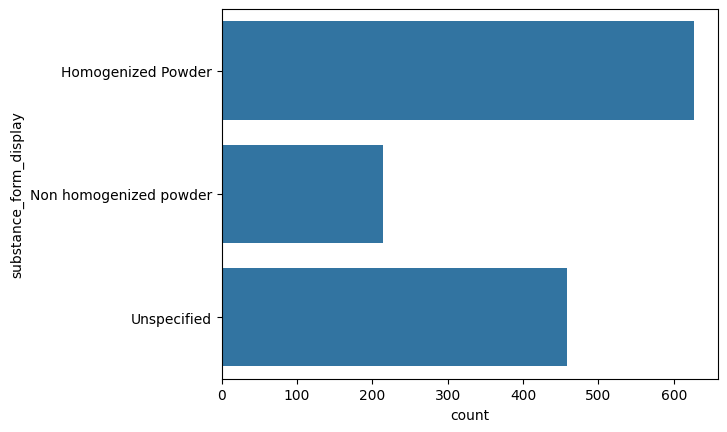

<Figure size 300x300 with 0 Axes>

In [21]:
sns.countplot(data['substance_form_display'])
plt.figure(figsize=(3,3))

##### Count of each device serial

<Axes: xlabel='count', ylabel='device_serial'>

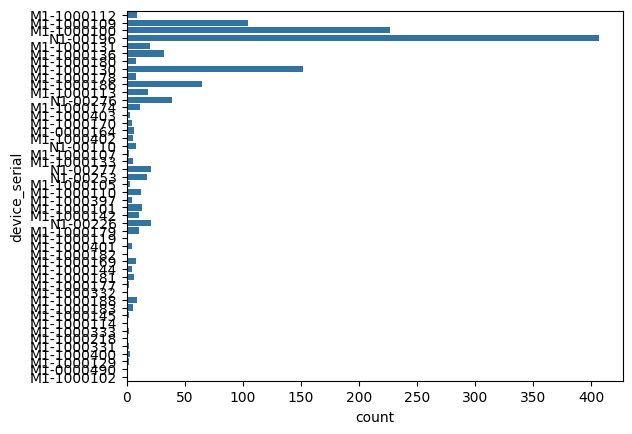

In [ ]:
sns.countplot(data['device_serial'])

##### Proportion of each purity

<Figure size 400x400 with 0 Axes>

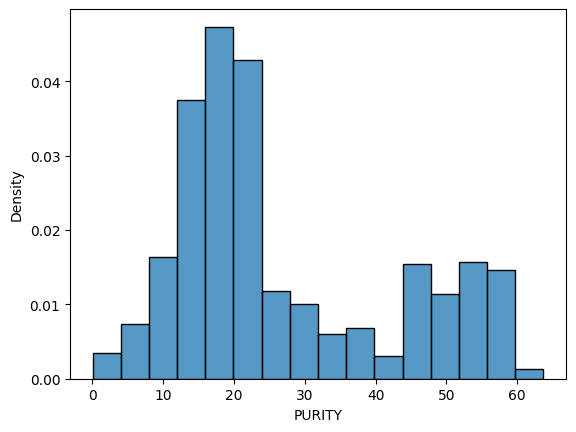

<Figure size 400x400 with 0 Axes>

In [8]:
sns.histplot(data['PURITY'], stat='density')
plt.figure(figsize=(4,4))

##### Purity distribution depending on the measure type of display

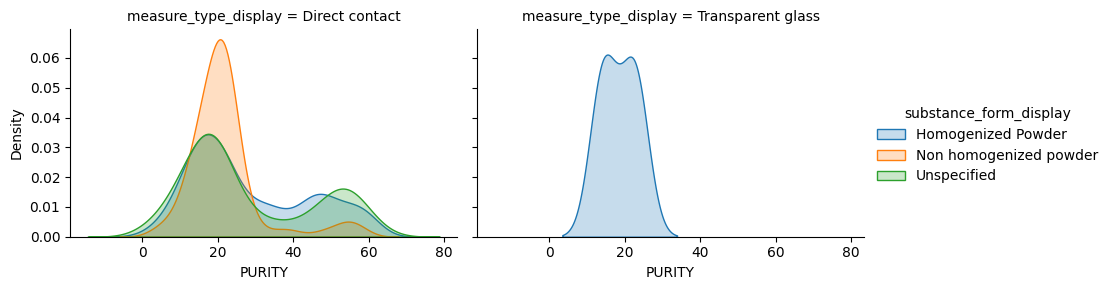

In [ ]:
g = sns.FacetGrid(data, col = 'measure_type_display', hue = 'substance_form_display', aspect= 1.5)
g.map(sns.kdeplot, 'PURITY', fill = True)
g.add_legend()


##### Intervals of purity depending on the substance form display

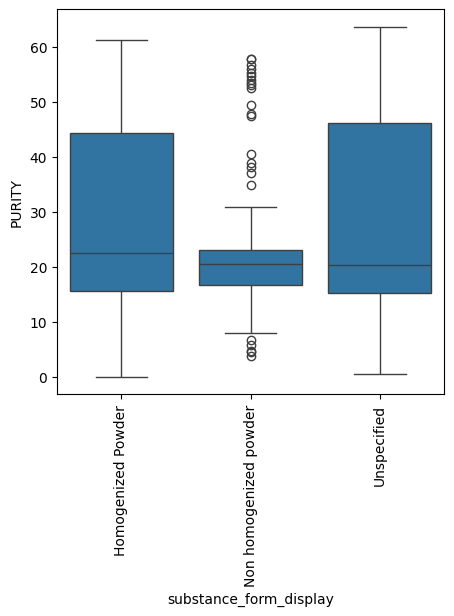

In [6]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(y = 'PURITY', x = 'substance_form_display', data = data, orient = 'v')
ax.tick_params(axis='x', rotation=90)

##### Heatmap of correlation between features

<Axes: >

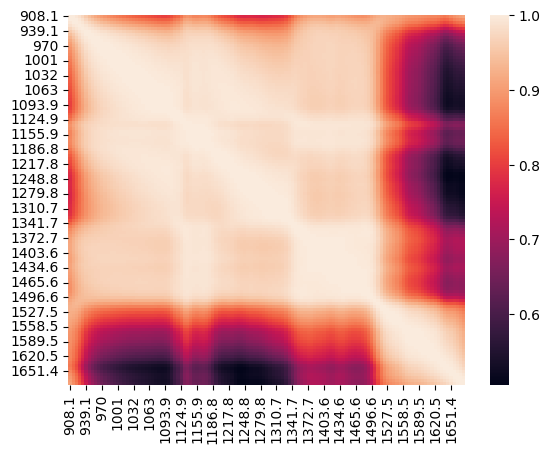

In [ ]:
sns.heatmap(data.iloc[:, 6:].corr())

##### Feature vs purity

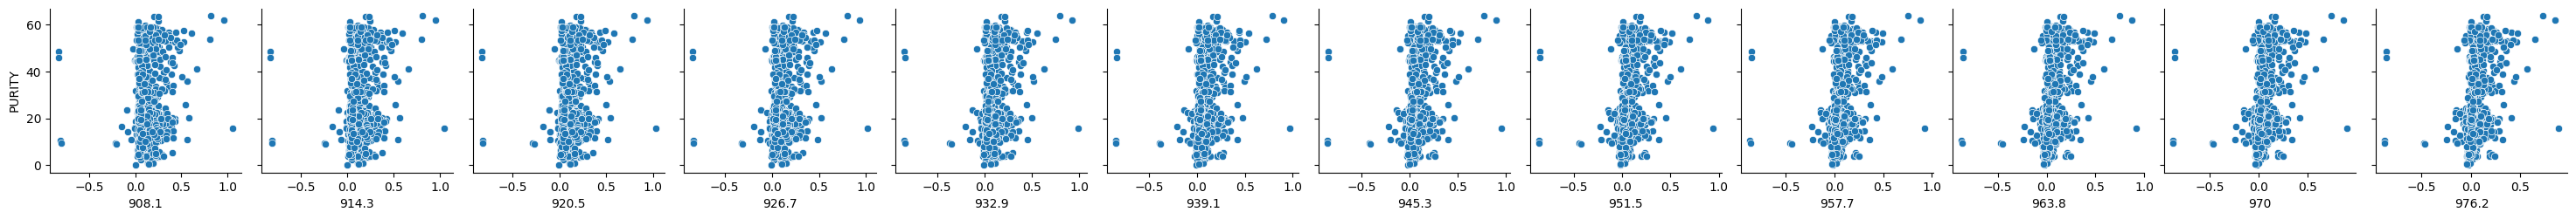

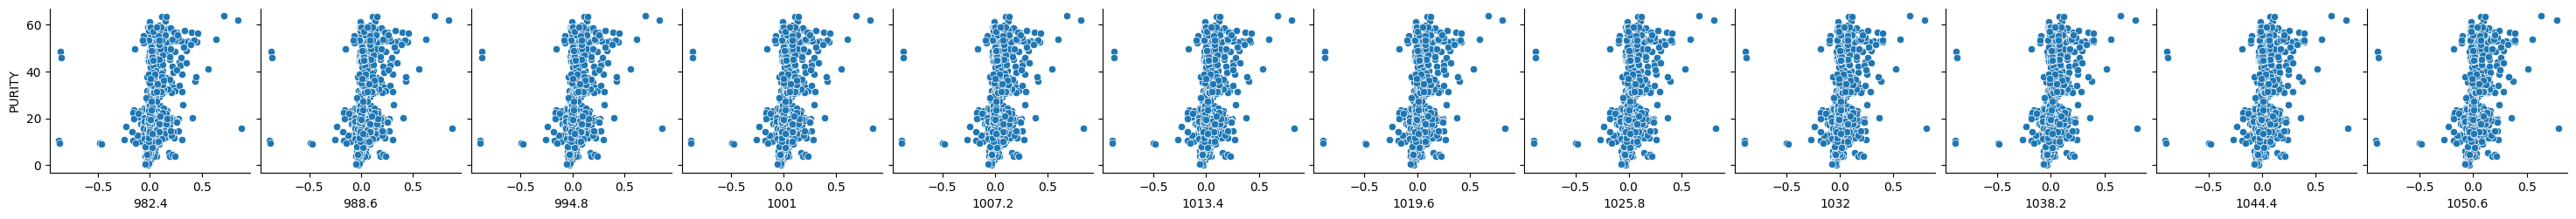

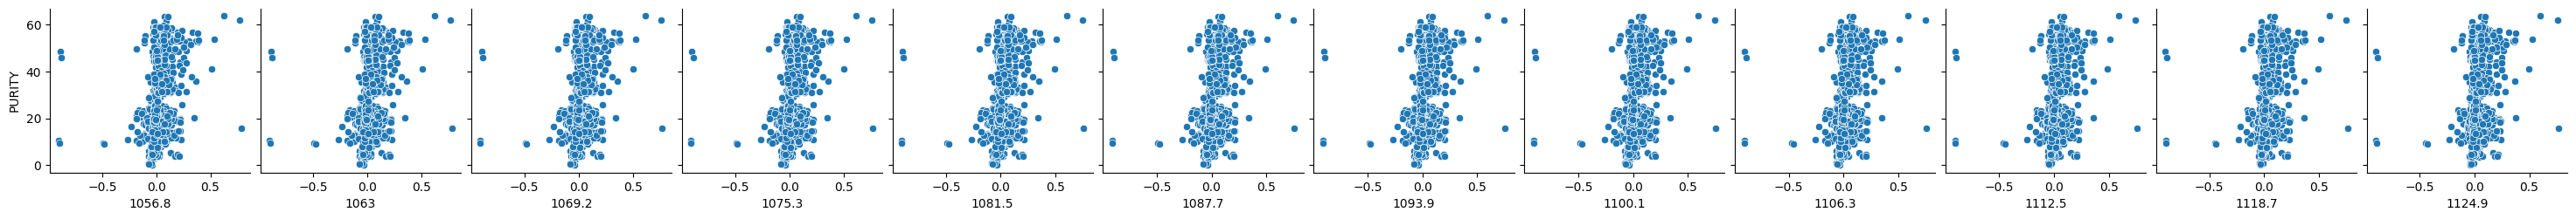

In [29]:
n = 0
for i in range (1, 4):
    sns.pairplot(data=data, x_vars= data.iloc[:, 6 + n :6 + i*12].columns.values, y_vars = 'PURITY')
    n = i*12

##### Correlation of each feature with the purity

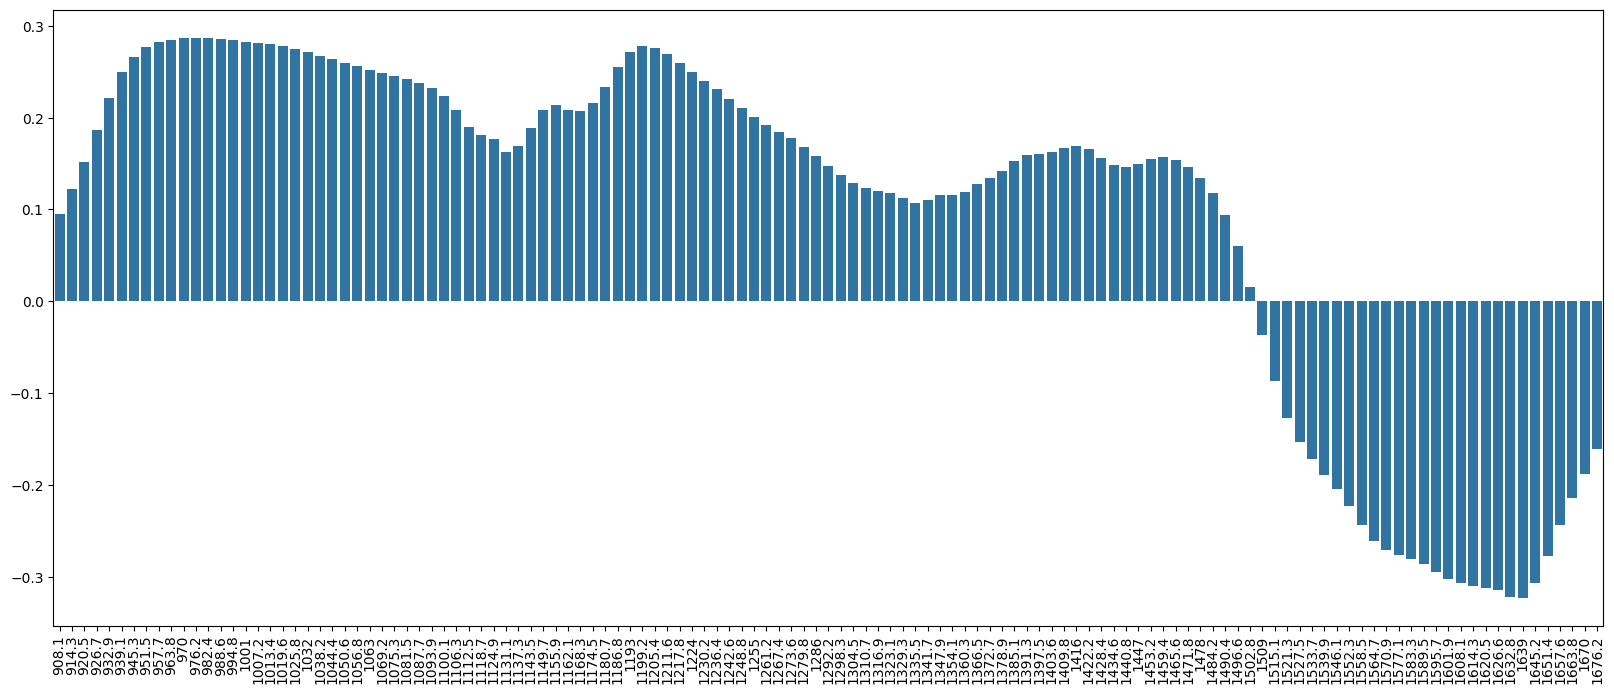

In [ ]:
corrwithpurity = data.iloc[:, 6:].corrwith(data['PURITY'])
plt.figure(figsize=(20,8))
ax = sns.barplot(data = corrwithpurity)
ax.tick_params(axis='x', rotation=90)

##### Count of each pure substance 

<Axes: xlabel='count', ylabel='substance'>

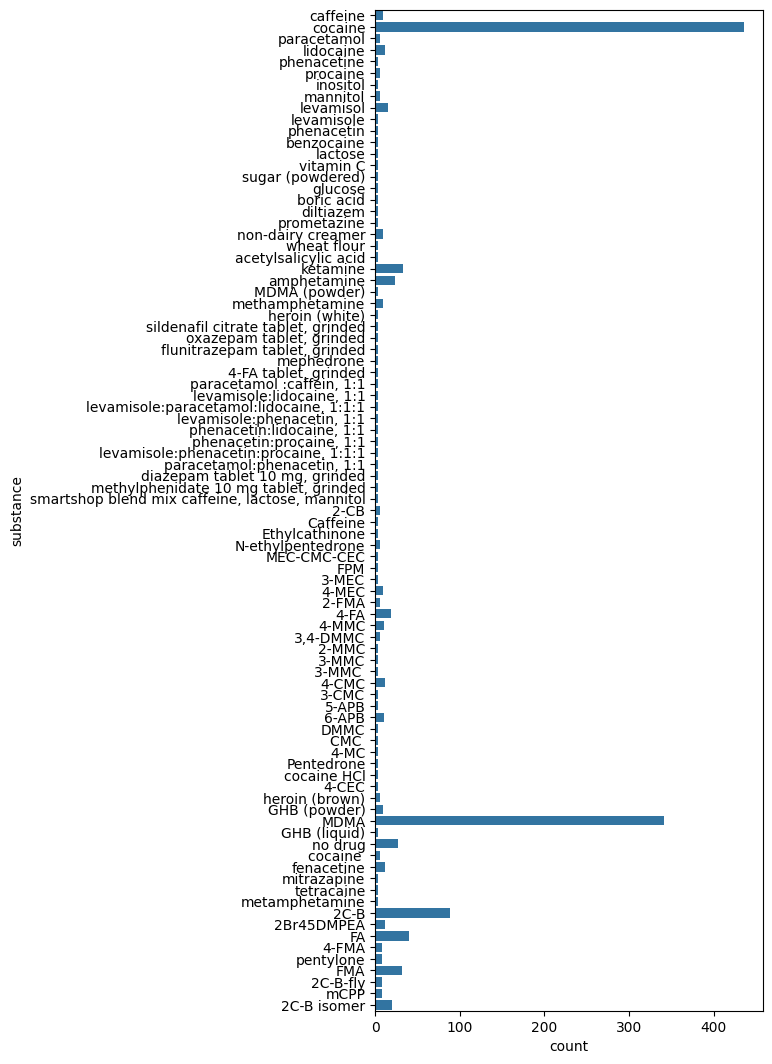

In [7]:
plt.figure(figsize=(5,13))
sns.countplot(substances_pure['substance'])

##### Distribution of the properties of pure heroin substances

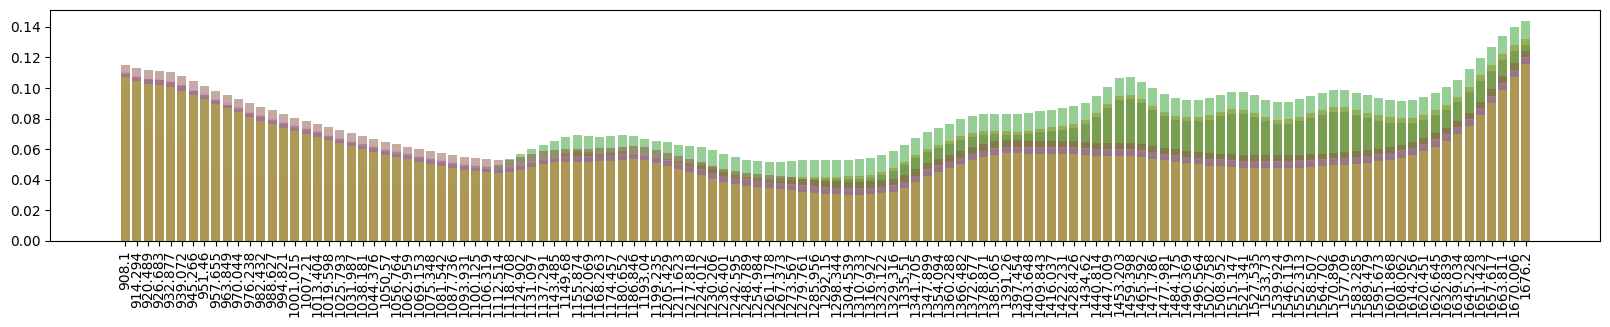

In [22]:
alpha=0.5
data_p =substances_pure[substances_pure['substance'].str.contains('heroin')]
for i in range(data_p.shape[0]):
    plt.bar(data_p.columns[1:], data_p.iloc[i, 1:], alpha=alpha)
labels=plt.xticks(rotation=90)

## Preprocessing

### · Linear

In [36]:
# Retrieve the data
data = pd.read_csv("./train.csv")
subspures = pd.read_csv("./substances.csv")
pure_heroin = subspures[(subspures['substance'] == 'heroin (white)') | (subspures["substance"]=="heroin (brown)")]

# Create new features by multiplying the data with the pure heroin
normalized_data = preprocessing.normalize(data.iloc[:, 6:].values)
normalized_substances = preprocessing.normalize(subspures.iloc[:,1:].values)
data_new_features2 = data.iloc[:, 6:].values.dot(subspures.iloc[:,1:].values.T)

# Filter the data
spectrum = data_new_features2
spectrum_filtered = pd.DataFrame(savgol_filter(spectrum, 7, 3, deriv = 2, axis = 1))

# Split the data into train and validation
X = data_new_features2
y = data['PURITY']

# Perform PCA
pca = PCA(n_components=40)
pca.fit(X)
X_pca = pca.transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create new features by computing the distance between the data and the pure heroin
#distances = cdist(data.iloc[:,6:].to_numpy(), pure_heroin.iloc[:, 1:].to_numpy(), metric = 'euclidean')
#dist_her = pd.DataFrame(distances, index = data.iloc[:,6:].index, columns=pure_heroin.iloc[:,1:].index)

### · Non-linear

In [17]:
# Retrieve the data
data_train = pd.read_csv("./train.csv")
data_test = pd.read_csv("./test.csv")
X_train = data_train.iloc[:, 6:]
X_test = data_test.iloc[:, 5:]

y = data_train["PURITY"]/100

In [18]:
# Perform PCA 
pca = PCA(n_components = 40)
pca.fit(X_train)
X_pca = pca.transform(X_train)

# Standardize the data
standardizer = StandardScaler()
X_st = standardizer.fit_transform(X_train)

# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).reshape(-1, 1)

# Standardize and perform PCA on the test data
X_st = standardizer.transform(X_test)
X_pca = pca.transform(X_st)
X_test_tensor = torch.tensor(X_pca, dtype=torch.float32)


/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


## Linear Model

In [38]:
model = Ridge() # Ridge regression model
param_grid = {'alpha': np.logspace(-10, 0, 100)} # Hyperparamater grid

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

mach1 = grid_search.best_estimator_ 
mach1.fit(X_train, y_train) 
predictions = mach1.predict(X_valid)

y_pred1 = mach1.predict(X_train)
y_pred2 = mach1.predict(X_valid)
train_score = np.mean(np.abs(y_pred1-y_train)<=5)
test_score = np.mean(np.abs(y_pred2-y_valid)<=5)
print("Train score ridge :", train_score)
print("Test score ridge :", test_score)

/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: User

Train score ridge : 0.6759615384615385
Test score ridge : 0.6884615384615385


/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.66726e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=5.20375e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


## Non-linear model

In [ ]:
import torch
import torch.nn as nn
from torch import Tensor

class MyLoss(nn.Module):  # Hérite de nn.Module
    def __init__(self, reduction: str = 'mean'):
        super(MyLoss, self).__init__()
        self.reduction = reduction

    def forward(self, output: Tensor, target: Tensor) -> Tensor:
        # Calcul de la perte personnalisée
        loss = torch.maximum(torch.zeros_like(output), (output - target) - 0.05) + \
               torch.maximum(torch.zeros_like(target), (target - output) - 0.05)

        # Applique la réduction spécifiée
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:  # 'none'
            return loss

In [ ]:
from sklearn.metrics import make_scorer

def my_scorer(y_true, y_pred):
    y_true = y_true.detach().numpy()
    return np.mean(np.abs(y_pred-y_true)*100<=5)

custom_scorer = make_scorer(my_scorer, greater_is_better=True)

In [ ]:
# Define the FeedForwardNN class
class FeedForwardNN(nn.Module):

    def __init__(self, input_size, lin_layer_sizes,
                 outpout_size, lin_layer_dropouts, activation):
        
        super().__init__()
        
        if activation == 0:
            self.activation = nn.ReLU()
        elif activation == 1:
            self.activation = nn.SiLU()
        elif activation == 2:
            self.activation = nn.Tanh()
        elif activation == 3:
            self.activation = nn.LeakyReLU()

        # Linear Layers
        first_lin_layer = nn.Linear(input_size, lin_layer_sizes[0])
    
        self.lin_layers = nn.ModuleList([first_lin_layer] + [nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1]) for i in range(len(lin_layer_sizes) - 1)])
      
        # Output Layer
        self.outpout_layer = nn.Linear(lin_layer_sizes[-1], outpout_size)
    
        # Dropout Layers
        self.dropout_layers = nn.ModuleList([nn.Dropout(rate) for rate,size in zip(lin_layer_dropouts,lin_layer_sizes)])

    def forward(self, x):
  
        for lin_layer, dropout_layer in zip(self.lin_layers, self.dropout_layers):

            x = lin_layer(x)
        
            x = self.activation(x)

            x = dropout_layer(x)
      
        x = self.outpout_layer(x)
        x = nn.Sigmoid()(x)
    
        return x
    
# Define the NeuralNetRegressor
class NeuralNetRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_size, random_state, eta=0.001, max_epochs=100, batch=10, lin_layer_sizes = [50, 50],
                 outpout_size = 1, lin_layer_dropouts = [0.4, 0.4], activation = 0):
        self.input_size = input_size
        self.random_state = random_state
        self.eta = eta
        self.max_epochs = max_epochs
        self.batch = batch
        self.lin_layer_sizes = lin_layer_sizes
        self.outpout_size = outpout_size
        self.lin_layer_dropouts = lin_layer_dropouts
        self.activation = activation
        self.model = FeedForwardNN(input_size, lin_layer_sizes,
                 outpout_size, lin_layer_dropouts, activation)
        self.criterion = nn.L1Loss()
    
    def fit(self, X, y, do_print=False):
        optimizer = optim.Adam(self.model.parameters(), lr=self.eta)
        X_tensor = torch.tensor(X).clone().detach().float()
        y_tensor = torch.tensor(y).clone().detach().float()
        dataset = TensorDataset(X_tensor, y_tensor)
        dataloader = DataLoader(dataset, batch_size=self.batch, shuffle=True)
        self.model.train()
        
        # Training loop
        for epoch in range(self.max_epochs):
            epoch_loss = 0.0
            for batch_X, batch_y in dataloader:
                optimizer.zero_grad()  # Reset gradients
                outputs = self.model(batch_X)  # Forward pass
                loss = self.criterion(outputs, batch_y)  # Compute loss
                loss.backward()  # Backward pass
                optimizer.step()  # Update parameters
                epoch_loss += loss.item()
            if do_print:
                print(f"Epoch {epoch+1}/{self.max_epochs}, Loss: {epoch_loss / len(dataloader)}")
        return self
    
    def predict(self, X):
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32)
        with torch.no_grad():
            outputs = self.model(X_tensor).flatten()
        return outputs.numpy()
    
    def parameters(self):
        return self.model.parameters()


In [ ]:
# Define the linear layer sizes dynamically
class RandomLayers:
    def __init__(self,min_layers, max_layers, min_nodes, max_nodes):
        self.min_nodes = min_nodes
        self.max_nodes = max_nodes
        self.min_layers = min_layers
        self.max_layers = max_layers

    def rvs(self, random_state=None):
        if random_state is not None:
            prev = randint.random_state
            randint.random_state = random_state 

        res = [[randint.rvs(self.min_nodes, self.max_nodes) for _ in range(randint.rvs(self.min_layers, self.max_layers))]]

        if random_state is not None:
            randint.random_state = prev

        return res

In [ ]:
# Define the linear layer dropouts dynamically
class RandomDropout:
    def __init__(self, max_layers,min_dropout,max_dropout):
        self.min_dropout = min_dropout
        self.max_dropout = max_dropout
        self.max_layers = max_layers

    def rvs(self, random_state=None):
        if random_state is not None:
            prev = uniform.random_state
            uniform.random_state = random_state 
        res = [[uniform.rvs(self.min_dropout, self.max_dropout) for _ in range(self.max_layers)]]

        if random_state is not None:
            uniform.random_state = prev

        return res

In [ ]:
# Initialize the model
seed = 43
np.random.seed(seed)
torch.manual_seed(seed)

input_size = X_train_tensor.shape[1]
net = NeuralNetRegressor(input_size=input_size, random_state=seed)

# Define the parameters for GridSearch
params_dist = {
    'eta': loguniform(1e-4, 1e-1),
    'max_epochs': randint(50, 150),
    'batch': randint(32, 70),
    'lin_layer_sizes': [[randint.rvs(32, 128) for _ in range(randint.rvs(1, 4))]],  # Taille de 1 à 4 couches, entre 32 et 128 neurones par couche
    'lin_layer_dropouts': [[uniform.rvs(0, 0.5) for _ in range(randint.rvs(1, 4))]],  # Dropout entre 0 et 0.5 pour chaque couche
    'activation': randint(0, 4),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(net, params_dist, refit=True, cv=5, random_state=seed, scoring='neg_mean_absolute_error', verbose=0)

# Train the model with the best hyperparameters
random_grid_result = random_search.fit(X_train_tensor, y_train_tensor)
nouveau_model = random_grid_result.best_estimator_

print("Best MSE: %f using %s" % (random_grid_result.best_score_, random_grid_result.best_params_))

y_pred = nouveau_model.predict(X_valid_tensor)
y_pred_train = nouveau_model.predict(X_train_tensor)
predictions = nouveau_model.predict(X_test_tensor)*100

# Verify that there are no NaN values in the predictions
print("y_pred contains NaN:", np.isnan(y_pred).any())

# Calculater the loss
mse = np.mean(((y_pred - y_valid)*100)**2)
print("MSE :", mse)

# Calculate the t_score
train_score = np.mean(np.abs(y_pred_train-y_train)*100<=5)
test_score = np.mean(np.abs(y_pred-y_valid)*100<=5)
print("t_score test :", train_score)
print("t_score train :", test_score)

ids = np.arange(1, len(predictions) + 1)

# Create a DataFrame for the output
output_df = pd.DataFrame({
    'ID': ids,
    'PURITY': predictions
})

# Save the DataFrame to a CSV file
output_df.to_csv('predictions.csv', index=False) 

# **Summary**

The aim of this project was to find the best model to predict the purity of heroin using the data from 1300 samples.

### Insights from exploration

In the visualization step, we loaded, explored and visualized the data from the training and the substances set. 

We plotted the correlation between each feature and the correlation of each feature with the purity. 
From these plots, we deduced that the correlation between the features was too high and therefore, it could be interesting to reduce the number of features used. On the other side, the low correlation of each feature with the purity revealed that a linear model wasn't the best fit for our data. 

Then, we made several plots to visualize the different categories of the first columns of the data. We plotted the substance display forms, the measure display types as well as the device serial numbers.

The pure substances were also plotted to observe what types of substances were given. This informed us that there were 2 kinds of heroin and therefore, these were plotted to examine the features similarities between each type of pure heroin.

### Preprocessing

For the preprocessing step of both linear and non-linear models, we removed the first 6 columns of the dataset which only contained text and then we split the train set with a rate of 0.2 for the validation set.

We performed some feature engineering for the linear model. We created new features by making a dot product between the raw data from the training set and the pure substances furnished in substances.csv. We obtained 1432 features in total that we used in the linear model. Then, we also created features by computing the distances between the raw data and the pure heroin. We obtained 9 features in total, each feature being the distance between every sample (1300 in total) with one of the types of pure heroin (9 in total).

We applied PCA for each model: in the linear one, the PCA performed on the new features revealed that only 1 was necessary to explain the variance but we decided to keep more than 1 component and we chose 40; and in the non-linear one, the PCA performed on the raw data revealed that only 2 were necessary to explain the variance but instead we decided to optimize the number of components with the grid search.

Finally, for the Neural Network model, we used a standardization on the features. We also tried to apply the One Hot Encoding technique on the categorical variables contained in the first 5 columns.

##### *New features PCA*

<img src="PCA_new_features.png" alt="ONew features PCA" width="400">


##### *Original features PCA*

<img src="PCA_original_features.png" alt="Original features PCA" width="400">


### Linear method

At first, we tried to implement the polynomial method paired with a lineal model but the results were not as good as expected thus we decided to use the ridge regression method. We tried both the original features and the ones we created and the latter showed the best score.

We performed a GridSearch to find the best alpha hyperparameter and we plotted the RMSE versus Alpha to visualize the evolution of the RMSE depending on each alpha from 10^0 to 10^10.

##### *RMSE vs alpha*

<img src="RMSE_alpha.png" alt="RMSE vs Alpha" width="400">

##### Parameters of the model:
{'alpha': 3.2745491628777316e-09,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

The final score showed a small underfitting: 
- **train : 0.6506787330316742**

- **test : 0.7025641025641025**

### Neural Network

We performed a RandomizedSearch to find the best hyperparameters i.e. learning rate, the max number of epochs, the size of batches, the number of hidden layers and their sizes, the dropout for each layer and the activation function (ReLU, SiLU, Tanh or LeakyReLU). 

We performed a gradient descent with Adam optimizer and we used a weight decay of 1e-4. We also tried SGD optimizer but finally chose to kept the former one. **jsp si on utilise weight decay finalement**

For the loss, we tried several ones such as MSE, L1, Huber and we also created our own loss but the score was not as good as the MSE thus we kept it to evaluate the training. **finalement la loss est un hyperparametre**

We also tried to use the new features we created using the dot product but the result was not satisfactory.

#### *Neural Network Loss*

<img src="Loss_NN.png" alt="Loss Neural Network" width="400">


The two best scores we obtained were:
- **train :**

- **test :**

The hyperparameters were: 

- **train :**

- **test :**

The hyperparameters were:


# **Conclusion**

In the end, the neural network gave the best results. We tried different hyperparameters, including the number and size of the layers, using Randomized Search, but couldn't improve the score. So, we kept the model with a fixed architecture, where the layer sizes and number were chosen at the start. This limited our options, but with more time, we could have made further improvements. Additionally, the ridge regression model could have been further improved, but the neural network took too long to optimize.

# à modifier